# Dan Crowley & Wyatt Madden - Lab 6 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
from im2rgb import *
from pointclouds import *
random.seed(1)

## 1

In [2]:
# K-Means
#  Separate data points into K clusters with no other information.
# Inputs:
#  X - D-by-N matrix of N points in D dimensions.
#  K - Integer number of clusters to detect.
# Outputs:
#  mu - D-by-K matrix with the learned cluster centroids.
#  labels - Length N vector with integer (1, 2, ..., K) class assignments.

import random
import numpy as np

def km(X, K):
    #set first K centroids at random data points
    centroids = X.loc[random.sample(range(0, X.shape[0]), K)]
    
    #calculate first set of assignments to nearest centroid
    centroid_dist = np.empty((X.shape[0], K))
    for i in range(0, K):
        dist_from_i_centroid = np.sqrt(np.sum((X.loc[:,("x", "y")] - centroids.iloc[i])**2, axis = 1))
        centroid_dist[:, i] = dist_from_i_centroid
    X['centroid'] = np.argmin(centroid_dist, axis = 1)
    
    #recalculate centroids and reassign until stable
    while True:
        centroids = X.groupby('centroid').agg({'x': 'mean', 'y': 'mean'})
        for i in range(0, K):
            dist_from_i_centroid = np.sqrt(np.sum((X.loc[:,("x", "y")] - centroids.iloc[i])**2, axis = 1))
            centroid_dist[:, i] = dist_from_i_centroid
        X['centroid_new'] = np.argmin(centroid_dist, axis = 1)
        #check if centroid assignments didn't change
        if sum(X['centroid_new'] == X['centroid']) == X.shape[0]:
            break
        X['centroid'] = X['centroid_new']
        
    mu = centroids
    labels = X['centroid']
    
    return mu, labels


## 2

In [14]:
temp_cloud = pointclouds()
pc = pd.DataFrame(temp_cloud[0], columns = ("x", "y"))
pc["cluster"] = temp_cloud[1]

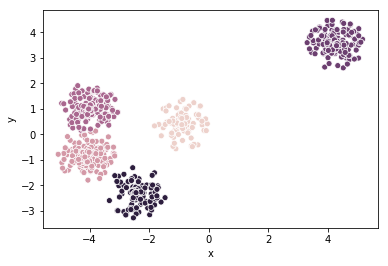

In [15]:
sns.scatterplot(x = "x", y = "y", hue = "cluster", data=pc, legend = False)

We see the five clusters, colored by the true centroid from which they were generated. We now cluster these with the K-means algorithm below, and plot the same points with shapes indicating which clusters the K-means assigned them to.  

In [16]:
temp_km = km(pc, 5)
pc["label"] = temp_km[1]

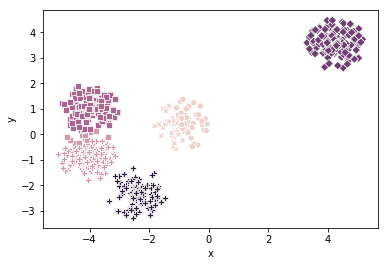

In [17]:
sns.scatterplot(x = "x", y = "y", hue = "cluster", style = "label", data=pc, legend = False)

We see that the k-means has near perfect assignment, other than for the two clusters that are slightly overlapping in the bottom left hand corner. 

In [33]:
I = mpimg.imread('mountains_small.png')
I.shape

(257, 500, 3)

In [3]:
im2rgb('mountains_small.png')


AttributeError: 'tuple' object has no attribute 'shape'

In [7]:
temp_km = km(X, 5)

NameError: name 'X' is not defined